# Train OCR text Detector quick example

In [1]:
import os
import sys
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')

# change this property
NOMEROFF_NET_DIR = os.path.abspath('../')
sys.path.append(NOMEROFF_NET_DIR)

from NomeroffNet.TextDetectors.base import OCR

In [2]:
plt.rcParams["figure.figsize"] = (10, 10)

In [3]:
%matplotlib inline 

In [4]:
# auto download latest dataset
from NomeroffNet.tools import modelhub

# auto download latest dataset
info = modelhub.download_dataset_for_model("By")
PATH_TO_DATASET = info["dataset_path"]

# local path dataset
#PATH_TO_DATASET = os.path.join(NOMEROFF_NET_DIR, "./data/dataset/OptionsDetector/numberplate_options_example")

In [5]:
PATH_TO_DATASET

'/var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/By/autoriaNumberplateOcrBy-2021-08-27'

In [6]:
DATASET_NAME = "by"
VERSION = "2021_08_27_pytorch_lightning"

RESULT_MODEL_PATH = os.path.join(NOMEROFF_NET_DIR, 
                                 "models/", 
                                 'anpr_ocr_{}_{}.ckpt'.format(DATASET_NAME, VERSION))

In [7]:
RESULT_MODEL_PATH

'/var/www/nomeroff-net24/models/anpr_ocr_by_2021_08_27_pytorch_lightning.ckpt'

In [8]:
class by(OCR):
    def __init__(self):
        OCR.__init__(self)
        # only for usage model
        # in train generate automaticly
        self.letters = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "C", "E", "H", "I", 
                        "K", "M", "O", "P", "T", "X"]

        # Train hyperparameters
        self.batch_size = 256
        self.epochs = 25
        self.gpus = 1

In [9]:
ocrTextDetector = by()
model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=False, num_workers=6)

GET ALPHABET
Max plate length in "val": 8
Max plate length in "train": 8
Max plate length in "test": 8
Letters train  {'X', '4', '0', 'T', '1', '6', '8', '2', 'O', '5', '9', '7', 'M', 'B', 'K', 'E', '3', 'P', 'A', 'H', 'C', 'I'}
Letters val  {'X', '4', '0', 'T', '1', '6', '8', '2', 'O', '5', '9', '7', 'M', 'B', 'K', 'E', '3', 'P', 'A', 'I', 'C', 'H'}
Letters test  {'X', '4', '0', 'T', '1', '6', '8', '2', 'O', '5', '9', '7', 'M', 'B', 'E', 'K', '3', 'P', 'A', 'I', 'C', 'H'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C E H I K M O P T X

EXPLAIN DATA TRANSFORMATIONS
START BUILD DATA
DATA PREPARED


In [10]:
#ocrTextDetector.load(RESULT_MODEL_PATH)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | resnet  | Sequential | 2.8 M 
1 | cnn     | BlockCNN   | 590 K 
2 | linear1 | Linear     | 524 K 
3 | gru1    | BlockRNN   | 139 K 
4 | gru2    | BlockRNN   | 16.9 K
5 | linear2 | Linear     | 1.5 K 
---------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.225    Total estimated model params size (MB)


Restored states from the checkpoint file at /var/www/nomeroff-net24/train/lr_find_temp_model.ckpt


Found lr: 0.5011872336272719



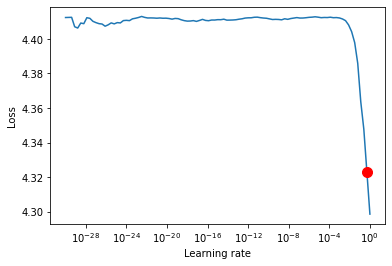

In [11]:
# tune
lr_finder = ocrTextDetector.tune()

# Plot with
fig = lr_finder.plot(suggest=True)
fig.show()

In [12]:
ocrTextDetector.train()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch    17: reducing learning rate of group 0 to 2.0000e-03.


Epoch    23: reducing learning rate of group 0 to 2.0000e-04.



[INFO] best model path /var/www/nomeroff-net24/NomeroffNet/data/logs/ocr/epoch=10-step=6940.ckpt


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.03212294355034828}
--------------------------------------------------------------------------------


NPOcrNet(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [13]:
ocrTextDetector.save(RESULT_MODEL_PATH)

model save to /var/www/nomeroff-net24/models/anpr_ocr_by_2021_08_27_pytorch_lightning.ckpt


In [14]:
#ocrTextDetector.load(RESULT_MODEL_PATH)

In [15]:
ocrTextDetector.test_acc(verbose=True)


[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/By/autoriaNumberplateOcrBy-2021-08-27/test/img/19269_7805KO5_0.png
Predicted: 7985kc5 			 True: 7885kc5

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/By/autoriaNumberplateOcrBy-2021-08-27/test/img/21177_A53PT7_0.png
Predicted: 45537pt7 			 True: 4537pt7

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/By/autoriaNumberplateOcrBy-2021-08-27/test/img/11893_172MX7_0.png
Predicted: 8742mt7 			 True: 1742mx7

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/By/autoriaNumberplateOcrBy-2021-08-27/test/img/679_1IB4554_0.png
Predicted: 11i3454 			 True: 1ibt4554

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/By/autoriaNumberplateOcrBy-2021-08-27/test/img/15595_24131K_0.png
Predicted: 2413k5 			 True: 2413kk5

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./d


[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/By/autoriaNumberplateOcrBy-2021-08-27/test/img/10299_5KBT1943_0.png
Predicted: 5kt1943 			 True: 5kbt1943

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/By/autoriaNumberplateOcrBy-2021-08-27/test/img/15186_GEAT8396_0.png
Predicted: 6ecat8396 			 True: 6eat8396

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/By/autoriaNumberplateOcrBy-2021-08-27/test/img/11944_PAT881B_1.png
Predicted: kato815 			 True: 7pat8815

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/By/autoriaNumberplateOcrBy-2021-08-27/test/img/11878_70XT1533_2.png
Predicted: 700t595 			 True: 7oxt1539

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/By/autoriaNumberplateOcrBy-2021-08-27/test/img/1506_7OM79079_0.png
Predicted: 7oom90794 			 True: 7omt9079

[INFO] /var/www/nomeroff-net24/NomeroffNet/tool

0.9581967213114754

In [ ]:
#ocrTextDetector.val_acc(verbose=False)
#ocrTextDetector.train_acc(verbose=False)

In [21]:
class by(OCR):
    def __init__(self):
        OCR.__init__(self)
        # only for usage model
        # in train generate automaticly
        self.letters = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "C", "E", "H", "I", 
                        "K", "M", "O", "P", "T", "X"]

        # Train hyperparameters
        self.batch_size = 256
        self.epochs = 15
        self.gpus = 1

In [24]:
ocrTextDetector = by()
model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=True, num_workers=4)

GET ALPHABET
Max plate length in "val": 7
Max plate length in "train": 7
Max plate length in "test": 7
Letters train  {'X', '4', '0', 'T', '1', '6', '8', '2', 'O', '5', '9', '7', 'M', 'B', 'K', 'E', '3', 'P', 'A', 'H', 'C', 'I'}
Letters val  {'X', '4', '0', 'T', '1', '6', '8', '2', 'O', '5', '9', '7', 'M', 'B', 'K', 'E', '3', 'P', 'A', 'I', 'C', 'H'}
Letters test  {'X', '4', '0', 'T', '1', '6', '8', '2', 'O', '5', '9', '7', 'M', 'B', 'E', 'K', '3', 'P', 'A', 'I', 'C', 'H'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C E H I K M O P T X

EXPLAIN DATA TRANSFORMATIONS
START BUILD DATA
DATA PREPARED


In [25]:
ocrTextDetector.load(RESULT_MODEL_PATH)

NPOcrNet(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [26]:
for i in range(1,11):
    # tune
    lr_finder = ocrTextDetector.tune()

    # Plot with
    #fig = lr_finder.plot(suggest=True)
    #fig.show()
    model = ocrTextDetector.train(seed=i)
    ocrTextDetector.test_acc(verbose=True)
    ocrTextDetector.save('{}.{}'.format(RESULT_MODEL_PATH,i))

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | resnet  | Sequential | 2.8 M 
1 | cnn     | BlockCNN   | 590 K 
2 | linear1 | Linear     | 524 K 
3 | gru1    | BlockRNN   | 139 K 
4 | gru2    | BlockRNN   | 16.9 K
5 | linear2 | Linear     | 1.5 K 
---------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.225    Total estimated model params size (MB)
Global seed set to 1


Restored states from the checkpoint file at /var/www/nomeroff-net24/train/lr_find_temp_model.ckpt
Global seed set to 1
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Found lr: 0.5011872336272719


Global seed set to 1


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


[INFO] best model path /var/www/nomeroff-net24/NomeroffNet/data/logs/ocr/epoch=5-step=3779.ckpt



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.022258173674345016}
--------------------------------------------------------------------------------

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/By/autoriaNumberplateOcrBy-2021-08-27/test/img/5343_8M13553_0.png
Predicted: am1353 			 True: am13553

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/By/autoriaNumberplateOcrBy-2021-08-27/test/img/9192_83480C7_0.png
Predicted: 93492c7 			 True: 9349cc7

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/By/autoriaNumberplateOcrBy-2021-08-27/test/img/968_L421MT7_0.png
Predicted: 447ht7 			 True: 4447ht7

[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/By/autoriaNumberplateOcrBy-2021-08-27/test/img/15595_24131K_0.png
Predicted: 2413k5 			 True: 2413kk5

[INFO] /var/www/nomeroff-net24

GPU available: True, used: True
TPU available: False, using: 0 TPU cores



[INFO] /var/www/nomeroff-net24/NomeroffNet/tools/../../data/./dataset/TextDetector/By/autoriaNumberplateOcrBy-2021-08-27/test/img/7517_5532MBT_1.png
Predicted: 558mb7 			 True: 5589mb7
Testing Accuracy:  0.9659751037344398
model save to /var/www/nomeroff-net24/models/anpr_ocr_by_2021_08_27_pytorch_lightning.ckpt.1


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | resnet  | Sequential | 2.8 M 
1 | cnn     | BlockCNN   | 590 K 
2 | linear1 | Linear     | 524 K 
3 | gru1    | BlockRNN   | 139 K 
4 | gru2    | BlockRNN   | 16.9 K
5 | linear2 | Linear     | 1.5 K 
---------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.225    Total estimated model params size (MB)
Global seed set to 1


Restored states from the checkpoint file at /var/www/nomeroff-net24/train/lr_find_temp_model.ckpt
Global seed set to 2
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Found lr: 0.12589254117941648


Global seed set to 2


RuntimeError: DataLoader worker (pid 344712) exited unexpectedly with exit code 1. Details are lost due to multiprocessing. Rerunning with num_workers=0 may give better error trace.